# Previous Class Questions

Make a function that generates the characters A, B, and C with probabilities 0.3, 0.2 and 0.5 respectively.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import cv2

In [10]:
def random_function():
    r = np.random.random()
    
    if r < .3:
        return 'A'
    elif r >= 0.3 and r < 0.5:
        return 'B'
    return 'C'

In [44]:
N = 10000
a, b, c = 0, 0, 0

for ix in range(N):
    v = random_function()
    
    if v == 'A':
        a += 1
    elif v == 'B':
        b += 1
    else:
        c += 1

print float(a)/N, float(b)/N, float(c)/N

0.3067 0.1995 0.4938


# Multi-variate Normal Distribution

$$
\mathbf{N}(\mu, \Sigma)
$$

In [108]:
# Create the mean and covariance matrices
mean_01 = np.array([0.0, 0.0])
mean_02 = np.array([5.0, 7.0])

cov_01 = np.array([[2.5, 0.0],
                   [0.0, 1.9]])


cov_02 = np.array([[2.0, 0.5],
                   [0.5, 3.0]])

In [117]:
# Generate the data distributions
data_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
data_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print data_01.shape, data_02.shape

(500, 2) (500, 2)


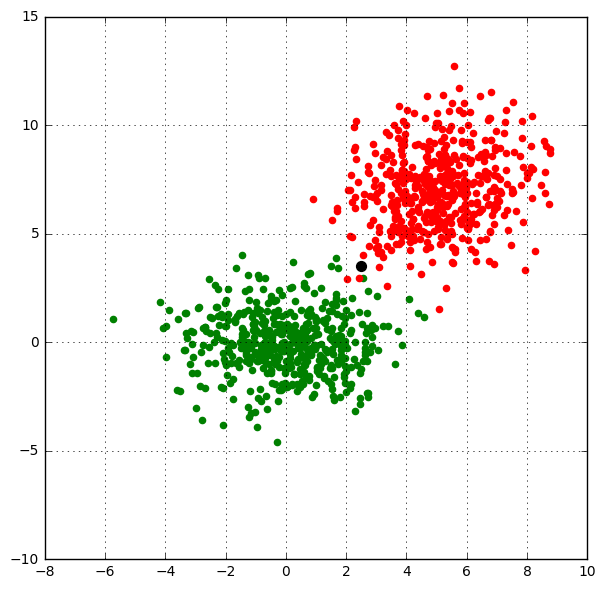

In [126]:
# Plot the data using scatter plot

plt.figure(0, figsize=(7, 7))
plt.grid("on")
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)
plt.scatter(data_01[:, 0], data_01[:, 1], color='green')
plt.scatter(data_02[:, 0], data_02[:, 1], color='red')
plt.scatter(2.5, 3.5, color='black', s=50)
plt.show()

## Problem Statement for nearest neighbours

In [130]:
# Prepare data
X = np.concatenate((data_01, data_02), axis=0)
y = np.zeros((X.shape[0],))
y[500:] = 1

print X.shape, y.shape

(1000, 2) (1000,)


In [150]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))


def knn(train, labels, test_x, k=5):
    dist = []
    
    for ix in range(train.shape[0]):
        # for every point, compute distance
        d = distance(train[ix], test_x)
        dist.append([d, labels[ix]])
    sorted_distances = sorted(dist, key=lambda x: x[0])
    candidates = np.asarray(sorted_distances)[:k, -1]
    
    freq = np.unique(candidates, return_counts=True)
    index = np.argmax(freq[1])
    
    return freq[0][index]

In [151]:
x = np.array([2.1, 3.2])

print knn(X, y, x)

0.0


In [162]:
import sklearn
from sklearn.datasets import load_digits

In [168]:
X, y = load_digits(return_X_y=True)

print X.shape, y.shape

(1797, 64) (1797,)


5


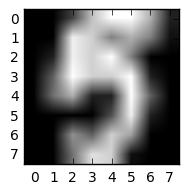

In [177]:
n = 457
plt.figure(0, figsize=(2, 2))
plt.imshow(X[n].reshape((8, 8)), cmap='gray')
print y[n]
plt.show()

In [178]:
# Divide into training and validation
train_X = X[:1500]
train_y = y[:1500]

val_X = X[1500:]
val_y = y[1500:]

print train_X.shape, train_y.shape
print val_X.shape, val_y.shape

(1500, 64) (1500,)
(297, 64) (297,)


In [185]:
import datetime
pred = []
target = []

start = datetime.datetime.now()
for ix in range(val_X.shape[0]):
    out = knn(train_X, train_y, val_X[ix], k=7)
    pred.append(out)
    target.append(val_y[ix])

pred = np.asarray(pred)
target = np.asarray(target)

stop = datetime.datetime.now()

acc = 100.0 * (pred == target).sum() / pred.shape[0]
print "Accuracy: {} in time: {}".format(acc, stop-start)

Accuracy: 94.6127946128 in time: 0:00:02.928267


## Compare with sklearn package

In [180]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
sk_knn = KNeighborsClassifier(n_neighbors=5)

sk_knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [188]:
preds = sk_knn.predict(val_X)
print preds.shape

print sk_knn.score(val_X, val_y)

(297,)
0.9562289562289562
